In [21]:
# MTF072 Computational Fluid Dynamics
# Task 3: laminar lid-driven cavity
# Template prepared by:
# Gonzalo Montero Villar
# Department of Mechanics and Maritime Sciences
# Division of Fluid Dynamics
# December 2020

#==============Packages needed=================
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import line_profiler as lp


lineProfiler = lp.LineProfiler() #Initialize profiler

In [22]:
#================= Functions ==================

def rhieChow(U,V,P,dx_CV,dy_CV,fxe,fxw,fyn,fys,coeffsUV,nI,nJ,Fe,Fw,Fn,Fs,rho):
    aPe = np.zeros((nI,nJ))
    aPw = np.zeros((nI,nJ))
    aPn = np.zeros((nI,nJ))
    aPs = np.zeros((nI,nJ))

    aPe[1:nI-1,1:nJ-1] = ((fxe[1:nI-1,1:nJ-1] * coeffsUV[2:nI,1:nJ-1,4]) + (1 - fxe[1:nI-1,1:nJ-1])*coeffsUV[1:nI-1,1:nJ-1,4])
    aPw[1:nI-1,1:nJ-1] = ((fxw[1:nI-1,1:nJ-1] * coeffsUV[0:nI-2,1:nJ-1,4]) + (1 - fxw[1:nI-1,1:nJ-1])*coeffsUV[1:nI-1,1:nJ-1,4])
    aPn[1:nI-1,1:nJ-1] = ((fyn[1:nI-1,1:nJ-1] * coeffsUV[1:nI-1,2:nJ,4]) + (1 - fyn[1:nI-1,1:nJ-1])*coeffsUV[1:nI-1,1:nJ-1,4])
    aPs[1:nI-1,1:nJ-1] = ((fys[1:nI-1,1:nJ-1] * coeffsUV[1:nI-1,0:nJ-2,4]) + (1 - fys[1:nI-1,1:nJ-1])*coeffsUV[1:nI-1,1:nJ-1,4])
    
    Fe[1:nI-2,1:nJ-1] =  ((fxe[1:nI-2,1:nJ-1] * U[2:nI-1,1:nJ-1] + (1 - fxe[1:nI-2,1:nJ-1])*U[1:nI-2,1:nJ-1]) + dy_CV[1:nI-2,1:nJ-1]/(4*aPe[1:nI-2,1:nJ-1])*(P[3:nI,1:nJ-1] - 3*P[2:nI-1,1:nJ-1] + 3*P[1:nI-2,1:nJ-1] - P[0:nI-3,1:nJ-1]))*rho * dy_CV[1:nI-2,1:nJ-1] # east convective
    Fe[nI-2,1:nJ-1] =  (fxe[nI-2,1:nJ-1] * U[nI-1,1:nJ-1] + (1 - fxe[nI-2,1:nJ-1])*U[nI-2,1:nJ-1]) * rho * dy_CV[nI-2,1:nJ-1]

    Fw[2:nI-1,1:nJ-1] =  ((fxw[2:nI-1,1:nJ-1] * U[1:nI-2,1:nJ-1] + (1 - fxw[2:nI-1,1:nJ-1])*U[2:nI-1,1:nJ-1]) + dy_CV[2:nI-1,1:nJ-1]/(4*aPw[2:nI-1,1:nJ-1])*(P[3:nI,1:nJ-1] - 3*P[2:nI-1,1:nJ-1] + 3*P[1:nI-2,1:nJ-1] - P[0:nI-3,1:nJ-1]))*rho * dy_CV[2:nI-1,1:nJ-1] # west convective
    Fw[1,1:nJ-1] =  (fxw[1,1:nJ-1] * U[0,1:nJ-1] + (1 - fxw[1,1:nJ-1])*U[1,1:nJ-1]) * rho * dy_CV[1,1:nJ-1]  

    Fn[1:nI-1,1:nJ-2] =  ((fyn[1:nI-1,1:nJ-2] * V[1:nI-1,2:nJ-1] + (1 - fyn[1:nI-1,1:nJ-2])*V[1:nI-1,1:nJ-2]) + dx_CV[1:nI-1,1:nJ-2]/(4*aPn[1:nI-1,1:nJ-2])*(P[1:nI-1,3:nJ] - 3*P[1:nI-1,2:nJ-1] + 3*P[1:nI-1,1:nJ-2] - P[1:nI-1,0:nJ-3]))*rho * dx_CV[1:nI-1,1:nJ-2] # north convective
    Fn[1:nI-1,nJ-2] =  (fyn[1:nI-1,nJ-2] * V[1:nI-1,nJ-1] + (1 - fyn[1:nI-1,nJ-2])*V[1:nI-1,nJ-2]) * rho * dx_CV[1:nI-1,nJ-2] 

    Fs[1:nI-1,2:nJ-1] =  ((fys[1:nI-1,2:nJ-1] * V[1:nI-1,1:nJ-2] + (1 - fys[1:nI-1,2:nJ-1])*V[1:nI-1,2:nJ-1]) + dx_CV[1:nI-1,2:nJ-1]/(4*aPs[1:nI-1,2:nJ-1])*(P[1:nI-1,3:nJ] - 3*P[1:nI-1,2:nJ-1] + 3*P[1:nI-1,1:nJ-2] - P[1:nI-1,0:nJ-3]))*rho * dx_CV[1:nI-1,2:nJ-1] # south convective
    Fs[1:nI-1,1] =  (fys[1:nI-1,1] * V[1:nI-1,0] + (1 - fys[1:nI-1,1])*V[1:nI-1,1]) * rho * dx_CV[1:nI-1,1]
                
    return [Fe,Fw,Fn,Fs]


    
def main(mI,mJ,xL,yL,mu,UWall,nIterations,alphaUV,n_inner_iterations_gs_mom,n_inner_iterations_gs_p,rho,alphaP,resTolerance):
    # For all the matrices the first input makes reference to the x coordinate
    # and the second input to the y coordinate, (i+1) is east and (j+1) north

    # Allocate all needed variables
    nI = mI + 1                      # number of nodes in the X direction. nodes 
                                    # added in the boundaries
    nJ = mJ + 1                      # number of nodes in the Y direction. nodes 
                                    # added in the boundaries
    coeffsUV   = np.zeros((nI,nJ,5)) # coefficients for the U and V equation
                                    # E, W, N, S and P
    sourceUV   = np.zeros((nI,nJ,2)) # source coefficients for the U and V equation
                                    # U and V
    coeffsPp   = np.zeros((nI,nJ,5)) # coefficients for the pressure correction
                                    # equation E, W, N, S and P
    sourcePp   = np.zeros((nI,nJ))   # source coefficients for the pressure
                                    # correction equation
    U          = np.zeros((nI,nJ))   # U velocity matrix
    FUVfaces     = np.zeros((nI,nJ,4)) # U velocity at the faces
    V          = np.zeros((nI,nJ))   # V velocity matrix
    Vfaces     = np.zeros((nI,nJ,4)) # V velocity at the faces
    P          = np.zeros((nI,nJ))   # pressure matrix
    Pp         = np.zeros((nI,nJ))   # pressure correction matrix

    massFlows  = np.zeros((nI,nJ,4)) # mass flows at the faces
                                    # m_e, m_w, m_n and m_s

    residuals  = np.zeros((3,1))     # U, V and conitnuity residuals

    # Generate mesh and compute geometric variables

    # Allocate all variables matrices
    xCoords_N = np.zeros((nI,nJ)) # X coords of the nodes
    yCoords_N = np.zeros((nI,nJ)) # Y coords of the nodes
    #xCoords_M = np.zeros((mI,mJ)) # X coords of the mesh points
    #yCoords_M = np.zeros((mI,mJ)) # Y coords of the mesh points
    dxe_N     = np.zeros((nI,nJ)) # X distance to east node
    dxw_N     = np.zeros((nI,nJ)) # X distance to west node
    dyn_N     = np.zeros((nI,nJ)) # Y distance to north node
    dys_N     = np.zeros((nI,nJ)) # Y distance to south node
    dx_CV      = np.zeros((nI,nJ)) # X size of the node
    dy_CV      = np.zeros((nI,nJ)) # Y size of the node

    fxe = np.zeros((nI,nJ))
    fxw = np.zeros((nI,nJ))
    fyn = np.zeros((nI,nJ))
    fys = np.zeros((nI,nJ))

    Fe = np.zeros((nI,nJ))
    Fw = np.zeros((nI,nJ))
    Fn = np.zeros((nI,nJ))
    Fs = np.zeros((nI,nJ))

    De = np.zeros((nI,nJ))
    Dw = np.zeros((nI,nJ))
    Dn = np.zeros((nI,nJ))
    Ds = np.zeros((nI,nJ))

    pGradE = np.zeros((nI,nJ))
    pGradW = np.zeros((nI,nJ))
    pGradN = np.zeros((nI,nJ))
    pGradS = np.zeros((nI,nJ))

    tempZeroes = np.zeros((nI,nJ))

    residuals_U = []
    residuals_V = []
    residuals_c = []

    dx = xL/(mI - 1)
    dy = yL/(mJ - 1)

    # Fill the coordinates
    xTemp = np.arange(0,mI)*dx
    yTemp = np.arange(0,mJ)*dy

    xCoords_M, yCoords_M = np.meshgrid(xTemp,yTemp,indexing='ij')

    # Fill the coordinates
    for i in range(mI):
        for j in range(mJ):
            # For the mesh points
            #xCoords_M[i,j] = i*dx
            #yCoords_M[i,j] = j*dy

            # For the nodes
            if i > 0:
                xCoords_N[i,j] = 0.5*(xCoords_M[i,j] + xCoords_M[i-1,j])
            if i == mI-1 and j>0:
                yCoords_N[i+1,j] = 0.5*(yCoords_M[i,j] + yCoords_M[i,j-1])
            if j > 0:
                yCoords_N[i,j] = 0.5*(yCoords_M[i,j] + yCoords_M[i,j-1])
            if j == mJ-1 and i>0:
                xCoords_N[i,j+1] = 0.5*(xCoords_M[i,j] + xCoords_M[i-1,j])

            # Fill dx_CV and dy_CV
            if i > 0:
                dx_CV[i,j] = xCoords_M[i,j] - xCoords_M[i-1,j]
            if j > 0:
                dy_CV[i,j] = yCoords_M[i,j] - yCoords_M[i,j-1]

    xCoords_N[-1,:] = xL
    yCoords_N[:,-1] = yL


    # Fill dxe, dxw, dyn and dys
    dxe_N[1:nI-1,1:nJ-1] = xCoords_N[2:nI,1:nJ-1] - xCoords_N[1:nI-1,1:nJ-1]
    dxw_N[1:nI-1,1:nJ-1] = xCoords_N[1:nI-1,1:nJ-1] - xCoords_N[0:nI-2,1:nJ-1]
    dyn_N[1:nI-1,1:nJ-1] = yCoords_N[1:nI-1,2:nJ] - yCoords_N[1:nI-1,1:nJ-1]
    dys_N[1:nI-1,1:nJ-1] = yCoords_N[1:nI-1,1:nJ-1] - yCoords_N[1:nI-1,0:nJ-2]

    # Initialize variable matrices
    U[:,:] = 0
    V[:,:] = 0
    P[:,:] = 0

    # Compute f and D
    fxe[1:nI-1,1:nJ-1] = 0.5*dx_CV[1:nI-1,1:nJ-1]/dxe_N[1:nI-1,1:nJ-1]
    fxw[1:nI-1,1:nJ-1] = 0.5*dx_CV[1:nI-1,1:nJ-1]/dxw_N[1:nI-1,1:nJ-1]
    fyn[1:nI-1,1:nJ-1] = 0.5*dy_CV[1:nI-1,1:nJ-1]/dyn_N[1:nI-1,1:nJ-1]
    fys[1:nI-1,1:nJ-1] = 0.5*dy_CV[1:nI-1,1:nJ-1]/dys_N[1:nI-1,1:nJ-1]

    De[1:nI-1,1:nJ-1] = dy_CV[1:nI-1,1:nJ-1]*mu/dxe_N[1:nI-1,1:nJ-1]
    Dw[1:nI-1,1:nJ-1] = dy_CV[1:nI-1,1:nJ-1]*mu/dxw_N[1:nI-1,1:nJ-1]
    Dn[1:nI-1,1:nJ-1] = dx_CV[1:nI-1,1:nJ-1]*mu/dyn_N[1:nI-1,1:nJ-1]
    Ds[1:nI-1,1:nJ-1] = dx_CV[1:nI-1,1:nJ-1]*mu/dys_N[1:nI-1,1:nJ-1]
            
    U[:,nJ-1] = UWall
    # Looping

    for iter in range(nIterations):
        # Compute Sp
        Sp = Fw - Fe + Fs - Fn

        ## Compute coefficients for inner nodes
        coeffsUV[1:nI-1,1:nJ-1,0] = De[1:nI-1,1:nJ-1] + np.maximum(tempZeroes[1:nI-1,1:nJ-1],-Fe[1:nI-1,1:nJ-1])
        coeffsUV[1:nI-1,1:nJ-1,1] = Dw[1:nI-1,1:nJ-1] + np.maximum(tempZeroes[1:nI-1,1:nJ-1],Fw[1:nI-1,1:nJ-1])
        coeffsUV[1:nI-1,1:nJ-1,2] = Dn[1:nI-1,1:nJ-1] + np.maximum(tempZeroes[1:nI-1,1:nJ-1],-Fn[1:nI-1,1:nJ-1])
        coeffsUV[1:nI-1,1:nJ-1,3] = Ds[1:nI-1,1:nJ-1] + np.maximum(tempZeroes[1:nI-1,1:nJ-1],Fs[1:nI-1,1:nJ-1])
                
        ## Compute source terms for inner nodes
        sourceUV[1:nI-1,1:nJ-1,0] = -0.5*(P[2:nI,1:nJ-1] - P[0:nI-2,1:nJ-1])*dy_CV[1:nI-1,1:nJ-1] + np.maximum(Sp[1:nI-1,1:nJ-1],tempZeroes[1:nI-1,1:nJ-1])*U[1:nI-1,1:nJ-1]
        sourceUV[1:nI-1,1:nJ-1,1] = -0.5*(P[1:nI-1,2:nJ] - P[1:nI-1,0:nJ-2])*dx_CV[1:nI-1,1:nJ-1] + np.maximum(Sp[1:nI-1,1:nJ-1],tempZeroes[1:nI-1,1:nJ-1])*V[1:nI-1,1:nJ-1]
        Sp[1:nI-1,1:nJ-1] = -np.maximum(-Sp[1:nI-1,1:nJ-1],tempZeroes[1:nI-1,1:nJ-1])
            
        ## Compute aP and introduce implicit under-relaxation for U and V
        coeffsUV[:,:,4] = (coeffsUV[:,:,0] + coeffsUV[:,:,1] + coeffsUV[:,:,2] + coeffsUV[:,:,3] - Sp[:,:])/alphaUV
        sourceUV[:,:,0] += (1-alphaUV)*coeffsUV[:,:,4]*U
        sourceUV[:,:,1] += (1-alphaUV)*coeffsUV[:,:,4]*V

            
        ## Solve for U and V using Gauss-Seidel   
        for gaussUViter in range(0,n_inner_iterations_gs_mom):

            # # Gauss-Seidel method
            # for i in range(1,nI-1):
            #    for j in range(1,nJ-1):
            #        U[i,j] = 1/coeffsUV[i,j,4]*(coeffsUV[i,j,0]*U[i+1,j] + coeffsUV[i,j,1]*U[i-1,j] + coeffsUV[i,j,2]*U[i,j+1] + coeffsUV[i,j,3]*U[i,j-1] + sourceUV[i,j,0])
            #        V[i,j] = 1/coeffsUV[i,j,4]*(coeffsUV[i,j,0]*V[i+1,j] + coeffsUV[i,j,1]*V[i-1,j] + coeffsUV[i,j,2]*V[i,j+1] + coeffsUV[i,j,3]*V[i,j-1] + sourceUV[i,j,1])

            ## Jacobi method
            U[1:nI-1,1:nJ-1] = 1/coeffsUV[1:nI-1,1:nJ-1,4]*(coeffsUV[1:nI-1,1:nJ-1,0]*U[2:nI,1:nJ-1] + coeffsUV[1:nI-1,1:nJ-1,1]*U[0:nI-2,1:nJ-1] + coeffsUV[1:nI-1,1:nJ-1,2]*U[1:nI-1,2:nJ] + coeffsUV[1:nI-1,1:nJ-1,3]*U[1:nI-1,0:nJ-2] + sourceUV[1:nI-1,1:nJ-1,0])
            V[1:nI-1,1:nJ-1] = 1/coeffsUV[1:nI-1,1:nJ-1,4]*(coeffsUV[1:nI-1,1:nJ-1,0]*V[2:nI,1:nJ-1] + coeffsUV[1:nI-1,1:nJ-1,1]*V[0:nI-2,1:nJ-1] + coeffsUV[1:nI-1,1:nJ-1,2]*V[1:nI-1,2:nJ] + coeffsUV[1:nI-1,1:nJ-1,3]*V[1:nI-1,0:nJ-2] + sourceUV[1:nI-1,1:nJ-1,1])
            
        ## Calculate at the faces using Rhie-Chow for the face velocities
        [Fe,Fw,Fn,Fs] = rhieChow(U,V,P,dx_CV,dy_CV,fxe,fxw,fyn,fys,coeffsUV,nI,nJ,Fe,Fw,Fn,Fs,rho)    
        

        ## Calculate pressure correction equation coefficients
        coeffsPp[1:nI-2,1:nJ-1,0] = dy_CV[1:nI-2,1:nJ-1]**2*rho/(fxe[1:nI-2,1:nJ-1] * coeffsUV[2:nI-1,1:nJ-1,4] + (1 - fxe[1:nI-2,1:nJ-1])*coeffsUV[1:nI-2,1:nJ-1,4])
        coeffsPp[nI-2,1:nJ-1,0] = 0

        coeffsPp[2:nI-1,1:nJ-1,1] = dy_CV[2:nI-1,1:nJ-1]**2*rho/(fxw[2:nI-1,1:nJ-1] * coeffsUV[1:nI-2,1:nJ-1,4] + (1 - fxw[2:nI-1,1:nJ-1])*coeffsUV[2:nI-1,1:nJ-1,4])
        coeffsPp[1,1:nJ-1,1] = 0

        coeffsPp[1:nI-1,1:nJ-2,2] = dx_CV[1:nI-1,1:nJ-2]**2*rho/(fyn[1:nI-1,1:nJ-2] * coeffsUV[1:nI-1,2:nJ-1,4] + (1 - fyn[1:nI-1,1:nJ-2])*coeffsUV[1:nI-1,1:nJ-2,4])
        coeffsPp[1:nI-1,nJ-2,2] = 0

        coeffsPp[1:nI-1,2:nJ-1,3] = dx_CV[1:nI-1,2:nJ-1]**2*rho/(fys[1:nI-1,2:nJ-1] * coeffsUV[1:nI-1,1:nJ-2,4] + (1 - fys[1:nI-1,2:nJ-1])*coeffsUV[1:nI-1,2:nJ-1,4])
        coeffsPp[1:nI-1,1,3] = 0
        
        sourcePp = Fw - Fe + Fs - Fn
        Spp = np.zeros([nI,nJ])
        coeffsPp[:,:,4] = coeffsPp[:,:,0] + coeffsPp[:,:,1] + coeffsPp[:,:,2] + coeffsPp[:,:,3] - Spp[:,:]


        # Solve for pressure correction (Note that more that one loop is used)
        Pp[:,:] = 0
        for iter_gs in range(n_inner_iterations_gs_p):

            # # Gauss-Seidel method
            # for j in range(1,nJ-1):
            #     for i in range(1,nI-1):    
            #         Pp[i,j] = 1/coeffsPp[i,j,4]*(coeffsPp[i,j,0]*Pp[i+1,j] + coeffsPp[i,j,1]*Pp[i-1,j] + coeffsPp[i,j,2]*Pp[i,j+1] + coeffsPp[i,j,3]*Pp[i,j-1] + sourcePp[i,j])
                    
            # for j in range(nJ-2,0,-1):
            #     for i in range(nI-2,0,-1): 
            #         Pp[i,j] = 1/coeffsPp[i,j,4]*(coeffsPp[i,j,0]*Pp[i+1,j] + coeffsPp[i,j,1]*Pp[i-1,j] + coeffsPp[i,j,2]*Pp[i,j+1] + coeffsPp[i,j,3]*Pp[i,j-1] + sourcePp[i,j])

            # Jacobi method
            Pp[1:nI-1,1:nJ-1] = 1/coeffsPp[1:nI-1,1:nJ-1,4]*(coeffsPp[1:nI-1,1:nJ-1,0]*Pp[2:nI,1:nJ-1] + coeffsPp[1:nI-1,1:nJ-1,1]*Pp[0:nI-2,1:nJ-1] + coeffsPp[1:nI-1,1:nJ-1,2]*Pp[1:nI-1,2:nJ] + coeffsPp[1:nI-1,1:nJ-1,3]*Pp[1:nI-1,0:nJ-2] + sourcePp[1:nI-1,1:nJ-1])

            Pp[nI-1,0:nJ] = Pp[nI-2,0:nJ]
            Pp[0,0:nJ] = Pp[1,0:nJ]
            Pp[0:nI,nJ-1] = Pp[0:nI,nJ-2]
            Pp[0:nI,0] = Pp[0:nI,1]
                
        # Set Pp with reference to node (2,2) and copy to boundaries
        Pp = Pp - Pp[1,1]
        
        # Correct velocities, pressure and mass flows
        P += alphaP*Pp
        
        P[nI-1,1:nJ-1] = P[nI-2,1:nJ-1] + pGradE[nI-3,1:nJ-1]*dxe_N[nI-2,1:nJ-1]
        P[0,nJ-1] = P[1,nJ-1] + pGradW[2,nJ-1]*dxw_N[1,nJ-1]
        P[1:nI-1,nJ-1] = P[1:nI-1,nJ-2] + pGradN[1:nI-1,nJ-3]*dyn_N[1:nI-1,nJ-2]
        P[1:nI-1,0] = P[1:nI-1,1] + pGradN[1:nI-1,2]*dys_N[1:nI-1,1] 
            
        U[1:nI-1,1:nJ-1] -= 0.5*(Pp[2:nI,1:nJ-1] - Pp[0:nI-2,1:nJ-1]) * dy_CV[1:nI-1,1:nJ-1] / coeffsUV[1:nI-1,1:nJ-1,4]
        V[1:nI-1,1:nJ-1] -= 0.5*(Pp[1:nI-1,2:nJ] - Pp[1:nI-1,0:nJ-2]) * dy_CV[1:nI-1,1:nJ-1] / coeffsUV[1:nI-1,1:nJ-1,4]

        [Fe,Fw,Fn,Fs] = rhieChow(U,V,P,dx_CV,dy_CV,fxe,fxw,fyn,fys,coeffsUV,nI,nJ,Fe,Fw,Fn,Fs,rho)
        
        
        # Compute residuals
        residuals_U.append(0) # U momentum residual
        residuals_V.append(0) # V momentum residual
        residuals_c.append(0) # continuity residual

        residuals_U[-1] = np.linalg.norm(coeffsUV[1:nI-1,1:nJ-1,4]*U[1:nI-1,1:nJ-1] - (coeffsUV[1:nI-1,1:nJ-1,0]*U[2:nI,1:nJ-1] + coeffsUV[1:nI-1,1:nJ-1,1]*U[0:nI-2,1:nJ-1] + coeffsUV[1:nI-1,1:nJ-1,2]*U[1:nI-1,2:nJ] + coeffsUV[1:nI-1,1:nJ-1,3]*U[1:nI-1,0:nJ-2] + sourceUV[1:nI-1,1:nJ-1,0]),1)
        residuals_V[-1] = np.linalg.norm(coeffsUV[1:nI-1,1:nJ-1,4]*V[1:nI-1,1:nJ-1] - (coeffsUV[1:nI-1,1:nJ-1,0]*V[2:nI,1:nJ-1] + coeffsUV[1:nI-1,1:nJ-1,1]*V[0:nI-2,1:nJ-1] + coeffsUV[1:nI-1,1:nJ-1,2]*V[1:nI-1,2:nJ] + coeffsUV[1:nI-1,1:nJ-1,3]*V[1:nI-1,0:nJ-2] + sourceUV[1:nI-1,1:nJ-1,1]),1)
        residuals_c[-1] = np.linalg.norm(Fw[1:nI-1,1:nJ-1] - Fe[1:nI-1,1:nJ-1] + Fs[1:nI-1,1:nJ-1] - Fn[1:nI-1,1:nJ-1],1)

        if (iter) % 1 == 0:
            print('iteration: %d\nresU = %.5e, resV = %.5e, resCon = %.5e\n\n'\
                % (iter, residuals_U[-1], residuals_V[-1], residuals_c[-1]))
        
        #  Check convergence
        if resTolerance>max([residuals_U[-1], residuals_V[-1], residuals_c[-1]]):
            print('iteration: %d\nresU = %.5e, resV = %.5e, resCon = %.5e\n\n'\
                % (iter, residuals_U[-1], residuals_V[-1], residuals_c[-1]))
            break
    return U,V,P,nI,nJ,xCoords_N,yCoords_N,residuals_c,residuals_U,residuals_V

In [23]:
#================= Inputs =====================

# Fluid properties and B. C. inputs

UWall = 1 # velocity of the upper wall
rho   = 1 # density
nu    = 1/1000 # kinematic viscosity
mu = nu*rho    # dynamics viscosity

data_file = open ('data_FOU_CD.txt')# data file where the given solution is stored

# Geometric inputs (fixed so that a fair comparison can be made)

mI = 101 # number of mesh points X direction. 
mJ = 101 # number of mesh points Y direction. 
xL =  1 # length in X direction
yL =  1 # length in Y direction

# Solver inputs
nIterations           = 100 # maximum number of iterations
n_inner_iterations_gs_mom = 10 # amount of inner iterations when solving 
n_inner_iterations_gs_p = 30
                              # pressure correction with Gauss-Seidel
resTolerance = 2e-5 # convergence criteria for residuals
                     # each variable
alphaUV = 0.1     # under relaxation factor for U and V
alphaP  = 0.1       # under relaxation factor for P

In [24]:
# ============ Run Solver ===============

profiler_wrapper = lineProfiler(main) #Create a wrapper for the function to be profiled
U,V,P,nI,nJ,xCoords_N,yCoords_N,residuals_c,residuals_U,residuals_V = profiler_wrapper(mI,mJ,xL,yL,mu,UWall,nIterations,alphaUV,n_inner_iterations_gs_mom,n_inner_iterations_gs_p,rho,alphaP,resTolerance) #Call the wrapper

lineProfiler.print_stats() #Print the results

iteration: 0
resU = 9.81754e-03, resV = 1.95006e-03, resCon = 6.49899e-03


iteration: 1
resU = 8.47864e-03, resV = 4.37642e-03, resCon = 6.37975e-03


iteration: 2
resU = 1.73081e-02, resV = 1.97263e-02, resCon = 1.79375e-02


iteration: 3
resU = 4.25161e-02, resV = 5.91641e-02, resCon = 4.82547e-02


iteration: 4
resU = 1.51090e-01, resV = 1.98405e-01, resCon = 9.14652e-02


iteration: 5
resU = 4.48817e-01, resV = 5.82332e-01, resCon = 1.60785e-01


iteration: 6
resU = 1.16036e+00, resV = 1.96575e+00, resCon = 3.81870e-01


iteration: 7
resU = 3.38306e+00, resV = 4.02716e+00, resCon = 4.51001e-01


iteration: 8
resU = 7.09468e+00, resV = 8.23192e+00, resCon = 9.90469e-01


iteration: 9
resU = 2.03362e+01, resV = 2.63442e+01, resCon = 2.02355e+00


iteration: 10
resU = 6.58965e+01, resV = 7.77051e+01, resCon = 3.24089e+00


iteration: 11
resU = 1.46467e+02, resV = 2.18155e+02, resCon = 5.77157e+00


iteration: 12
resU = 4.16841e+02, resV = 6.86754e+02, resCon = 1.14079e+01


iteration

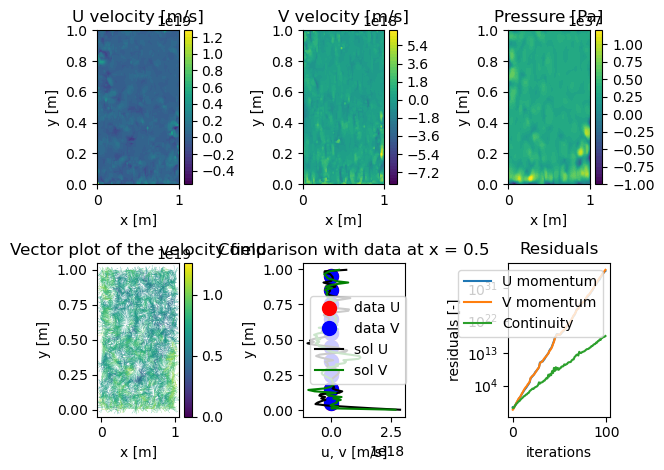

In [25]:
# ============== Plotting =================

#Velocity Vector normalization for plotting
UVvec = np.zeros((nI,nJ))
U_norm = np.zeros((nI,nJ))
V_norm = np.zeros((nI,nJ))
for i in range(1,nI-1):
    for j in range(1,nJ-1):
        UVvec[i,j] =np.sqrt(pow(U[i,j],2) + pow(V[i,j],2))
        U_norm[i,j] = U[i,j] / UVvec[i,j]
        V_norm[i,j] = V[i,j] / UVvec[i,j]


# Plot mesh
# plt.figure()
# plt.xlabel('x [m]')
# plt.ylabel('y [m]')
# plt.title('Computational mesh')
# plt.plot(xCoords_M.T,yCoords_M.T,'k')
# plt.plot(xCoords_M,yCoords_M,'k')
# plt.scatter(xCoords_N,yCoords_N)


# Plot results

plt.figure()

# U velocity contour
plt.subplot(2,3,1)
csu=plt.contourf(xCoords_N,yCoords_N,U,50)
plt.colorbar(csu)
plt.title('U velocity [m/s]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()

# V velocity contour
plt.subplot(2,3,2)
csv=plt.contourf(xCoords_N,yCoords_N,V,50)
plt.colorbar(csv)
plt.title('V velocity [m/s]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()

# P contour
plt.subplot(2,3,3)
csp=plt.contourf(xCoords_N,yCoords_N,P,50)
plt.colorbar(csp)
plt.title('Pressure [Pa]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()

# Vector plot
plt.subplot(2,3,4)
norm = mpl.colors.LogNorm()
concat_UVvec=np.concatenate(UVvec)
norm.autoscale(concat_UVvec)
colormap=mpl.cm.viridis
pcm=plt.quiver(xCoords_N, yCoords_N, U_norm, V_norm, color=colormap(norm(concat_UVvec)),scale=15)
plt.colorbar(pcm)
#plt.quiverkey(pcm, 0.765, 0.9, 1, '$m/s$',labelpos='E',coordinates='figure')
plt.clim(UVvec.min(),UVvec.max())
plt.title('Vector plot of the velocity field')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.tight_layout()

# Comparison with data
data=np.genfromtxt(data_file, skip_header=1)
uInterp = np.zeros((nJ-2,1))
vInterp = np.zeros((nJ-2,1))
for j in range(1,nJ-1):
    for i in range(1,nI-1):
        if xCoords_N[i,j]<0.5 and xCoords_N[i+1,j]>0.5:
            uInterp[j-1] = (U[i+1,j] + U[i,j])*0.5
            vInterp[j-1] = (V[i+1,j] + V[i,j])*0.5
            break
        elif abs(xCoords_N[i,j]-0.5) < 0.000001:
            uInterp[j-1] = U[i,j]
            vInterp[j-1] = V[i,j]
            break

plt.subplot(2,3,5)
plt.plot(data[:,0],data[:,2],'r.',markersize=20,label='data U')
plt.plot(data[:,1],data[:,2],'b.',markersize=20,label='data V')
plt.plot(uInterp,yCoords_N[1,1:-1],'k',label='sol U')
plt.plot(vInterp,yCoords_N[1,1:-1],'g',label='sol V')
plt.title('Comparison with data at x = 0.5')
plt.xlabel('u, v [m/s]')
plt.ylabel('y [m]')
plt.legend()

plt.subplot(2,3,6)
plt.plot(residuals_U, label='U momentum')
plt.plot(residuals_V, label='V momentum')
plt.plot(residuals_c, label='Continuity')
plt.title('Residual convergence')
plt.xlabel('iterations')
plt.ylabel('residuals [-]')
plt.legend()
plt.title('Residuals')
plt.yscale('log')

plt.show()
#plt.close()

